In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import datasets, svm, metrics
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

In [3]:
images = glob.glob('../input/the-car-connection-picture-dataset/*.jpg')

data = pd.DataFrame(images, columns=['src'])

data['brand'] = data['src'].apply(lambda x : x.split('_')[0].split('/')[-1])

data['brand'].value_counts().head(4)

Chevrolet    5079
Toyota       4598
Ford         4416
BMW          4121
Name: brand, dtype: int64

In [4]:

x = data[(data['brand']=='Chevrolet')].reset_index(drop=True)
x = x[0:4000]

y = data[(data['brand']=='Toyota')].reset_index(drop=True)
y = y[0:4000]

z = data[(data['brand']=='Ford')].reset_index(drop=True)
z = z[0:4000]

w = data[(data['brand']=='BMW')].reset_index(drop=True)
w = w[0:4000]

In [5]:
data = pd.concat([x, y, z, w], axis='rows').reset_index()

In [6]:
data

,index,src,brand
0,0,../input/the-car-connection-picture-dataset/Ch...,Chevrolet
1,1,../input/the-car-connection-picture-dataset/Ch...,Chevrolet
2,2,../input/the-car-connection-picture-dataset/Ch...,Chevrolet
3,3,../input/the-car-connection-picture-dataset/Ch...,Chevrolet
4,4,../input/the-car-connection-picture-dataset/Ch...,Chevrolet
...,...,...,...
15995,3995,../input/the-car-connection-picture-dataset/BM...,BMW
15996,3996,../input/the-car-connection-picture-dataset/BM...,BMW
15997,3997,../input/the-car-connection-picture-dataset/BM...,BMW
15998,3998,../input/the-car-connection-picture-dataset/BM...,BMW


### Usado 4 marcas Chevrolet, Toyota, Ford e BMW.

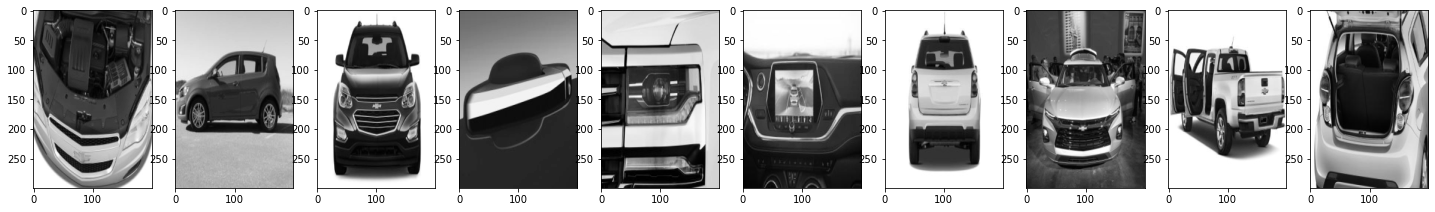

In [7]:
X= []
y= []
for i in range(len(data)):
    src = data.loc[i,'src']
    src = cv2.imread(src, cv2.IMREAD_COLOR)
    dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    X.append(cv2.resize(dst, dsize=(200, 300), interpolation=cv2.INTER_AREA))
    y.append(data.loc[i,'brand'])
    
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X[i], cmap='gray')

In [ ]:
y[:10]

## Changed the data to make model
1. Change the list to numpy array
2. Change the type int to float
3. Change the range 0 ~ 255 to 0 ~ 1
4. Change the shape (300,200) -> (16000, 60000) to make model


In [ ]:
X = np.array(X)
X = X.astype('float32')
X = X /255.0
X = X.reshape(len(X), -1)


In [ ]:
#tranformar Labels em números
LE = LabelEncoder()
y = LE.fit_transform(y)
#LE.inverse_transform(df['label'])

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:
#Uso de holdout 70% treino e 30% teste, stratified e random_state = 100
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,  stratify=y, random_state=100)

In [ ]:
#Modelos
clfSVM = svm.SVC(kernel = 'poly')
clfKNN = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
clfMLP = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5, hidden_layer_sizes=(32, 64, 64, 64), early_stopping=True, random_state=1, verbose= True)

In [ ]:
#teste Holdout MLP
#função de saída
clfMLP.outactvation = "softmax"
clfMLP.fit(X_train, y_train)

y_pred = clfMLP.predict(X_test)
accMLP = metrics.accuracy_score(y_test, y_pred)
print("Acurácia MLP:")
print(accMLP)

In [ ]:
#teste Holdout SVM com melhor parametro testado
clfSVM.fit(X_train, y_train)

y_pred = clfSVM.predict(X_test)
accSVM = metrics.accuracy_score(y_test, y_pred)
print("Acurácia SVM:")
print(accSVM)

In [ ]:
#teste Holdout KNN com melhor parametro testado
clfKNN.fit(X_train, y_train)

y_pred = clfKNN.predict(X_test)
accKNN = metrics.accuracy_score(y_test, y_pred)
print("Acurácia KNN:")
print(accKNN)

In [ ]:
#Cross validation StratifiedKfold
cv = StratifiedKFold(n_splits=5)

#Modelos e parametros para teste de cross validation
modelSVM = svm.SVC(kernel = 'poly')
modelKNN = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
modelMLP = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5, hidden_layer_sizes=(32, 64, 64, 64), early_stopping=True, random_state=1, verbose= True)



In [ ]:
#rodar cross validation para MLP
resultsMLP = cross_val_score(modelMLP, X, y, scoring='accuracy', cv=cv)
print("resultados MLP:")
print(resultsMLP)
print("media dos resultados:")
print(resultsMLP.mean())

In [ ]:
#rodar testes cross validation para SVM
resultsSVM = cross_val_score(modelSVM, X, y, scoring='accuracy', cv=cv)
print("resultados SVM:")
print(resultsSVM)
print("media dos resultados:")
print(resultsSVM.mean())

In [ ]:
#rodar testes cross validation para KNN
resultsKNN = cross_val_score(modelKNN, X, y, scoring='accuracy', cv=cv)
print("resultados SVM:")
print(resultsKNN)
print("media dos resultados:")
print(resultsKNN.mean())

In [ ]:
#parametros SVM
SVM_params = [{"kernel":"rbf"}, {"kernel":"poly"}, 
              {"kernel":"sigmoid"}, {"kernel":"linear"}]



modelSVM = [
    ['SVM', svm.SVC, SVM_params]
]

#gera todos os resultados para os parametros acima(Alto custo computacional)
def gerarResultadosSVM(Xtrain, Xtest, ytrain, ytest):
  resultados = []
  for modelname, Model, params_list in modelSVM:
      for params in params_list:
          model = Model(**params)
          model.fit(Xtrain, ytrain)
          predict = model.predict(Xtest)
          accuracy = "{0:.3f}".format(metrics.accuracy_score(ytest, predict))
          recall = "{0:.3f}".format(metrics.recall_score(ytest, predict, average = 'micro'))
          precision = "{0:.3f}".format(metrics.precision_score(ytest, predict, average = 'micro'))      
          resultados.append((modelname, params, accuracy, recall, precision))
  print((tabulate(resultados, headers=["Modelo", "parametros", "acurácia", "revocação", "precisão"])))

#Tempo estimado para execução 7 horas
#gerarResultadosSVM(X_train, X_test, y_train, y_test)

In [ ]:
#parametros KNN, trocar valor de "n_neighbors" caso desejar aumentar o número
#de vizinhos
KNN_params = [{"n_neighbors":3}, {"n_neighbors":3, "weights":'distance'}]

modelKNN = [['KNN', neighbors.KNeighborsClassifier, kneighbors_params]]

#gera todos os resultados para os parametros acima(Alto custo computacional)
def gerarResultadosKNN(Xtrain, Xtest, ytrain, ytest):
  resultados = []
  for modelname, Model, params_list in modelKNN:
      for params in params_list:
          model = Model(**params)
          model.fit(Xtrain, ytrain)
          predict = model.predict(Xtest)
          accuracy = "{0:.3f}".format(metrics.accuracy_score(ytest, predict))
          recall = "{0:.3f}".format(metrics.recall_score(ytest, predict, average = 'micro'))
          precision = "{0:.3f}".format(metrics.precision_score(ytest, predict, average = 'micro'))      
          resultados.append((modelname, params, accuracy, recall, precision))
  print((tabulate(resultados, headers=["Modelo", "parametros", "acurácia", "revocação", "precisão"])))

#Tempo estimado para execução 4 horas
#gerarResultadosKNN(X_train, X_test, y_train, y_test)